In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
#!pip install datasets
from datasets import load_dataset
from sklearn.model_selection import train_test_split

In [2]:
data1 = load_dataset('ade_corpus_v2', "Ade_corpus_v2_classification")
df1 = pd.DataFrame(data1["train"])
df1.to_csv("ade_relation_train.csv", index=None) 


data2 = load_dataset('ade_corpus_v2', "Ade_corpus_v2_drug_ade_relation")
df2 = pd.DataFrame(data2["train"])
df2 = df2.drop(columns=["indexes"])
df2.to_csv("ade_drug_ade.csv", index=None)

Found cached dataset ade_corpus_v2 (/home/nankli/.cache/huggingface/datasets/ade_corpus_v2/Ade_corpus_v2_classification/1.0.0/940d61334dbfac6b01ac5d00286a2122608b8dc79706ee7e9206a1edb172c559)


  0%|          | 0/1 [00:00<?, ?it/s]

Found cached dataset ade_corpus_v2 (/home/nankli/.cache/huggingface/datasets/ade_corpus_v2/Ade_corpus_v2_drug_ade_relation/1.0.0/940d61334dbfac6b01ac5d00286a2122608b8dc79706ee7e9206a1edb172c559)


  0%|          | 0/1 [00:00<?, ?it/s]

### EDA for "Ade_corpus_v2_classification"

In [3]:
# Display the first few rows
print(df1.head())


                                                text  label
0      Intravenous azithromycin-induced ototoxicity.      1
1  Immobilization, while Paget's bone disease was...      1
2  Unaccountable severe hypercalcemia in a patien...      1
3  METHODS: We report two cases of pseudoporphyri...      1
4  METHODS: We report two cases of pseudoporphyri...      1


In [4]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23516 entries, 0 to 23515
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    23516 non-null  object
 1   label   23516 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.6+ KB
None


In [5]:
# Display summary statistics for numeric columns
print(df1.describe())

              label
count  23516.000000
mean       0.290058
std        0.453798
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000


In [6]:
# Display the number of missing values for each column
print(df1.isna().sum())

text     0
label    0
dtype: int64


In [7]:
df1.label.value_counts()

0    16695
1     6821
Name: label, dtype: int64

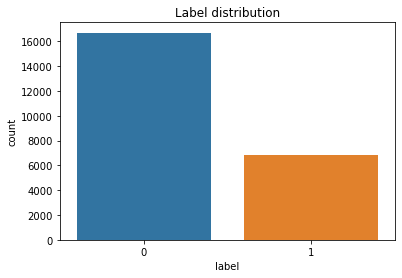

In [8]:
# Display a count plot of the label column
sns.countplot(x="label", data=df1)
plt.title("Label distribution")
plt.show()

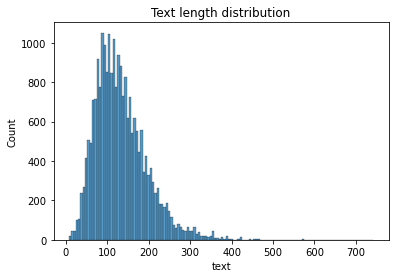

In [9]:
# Display a histogram of the text column lengths
sns.histplot(df1["text"].apply(len))
plt.title("Text length distribution")
plt.show()

In [10]:
# Check for duplicates
duplicates = df1.duplicated()

In [11]:
# Remove duplicates
df1 = df1.drop_duplicates()

In [12]:
df1

,text,label
0,Intravenous azithromycin-induced ototoxicity.,1
1,"Immobilization, while Paget's bone disease was...",1
2,Unaccountable severe hypercalcemia in a patien...,1
3,METHODS: We report two cases of pseudoporphyri...,1
5,"Naproxen, the most common offender, has been a...",1
...,...,...
23511,"At autopsy, the liver was found to be small, s...",0
23512,"Physical exam revealed a patient with aphasia,...",0
23513,At the time when the leukemia appeared seven o...,0
23514,The American Society for Regional Anesthesia a...,0


### EDA for "Ade_corpus_v2_drug_ade_relation"

In [13]:
# Display the first few rows
print(df2.head())

                                                text                drug  \
0      Intravenous azithromycin-induced ototoxicity.        azithromycin   
1  Immobilization, while Paget's bone disease was...  dihydrotachysterol   
2  Unaccountable severe hypercalcemia in a patien...  dihydrotachysterol   
3  METHODS: We report two cases of pseudoporphyri...            naproxen   
4  METHODS: We report two cases of pseudoporphyri...           oxaprozin   

                      effect  
0                ototoxicity  
1  increased calcium-release  
2              hypercalcemia  
3            pseudoporphyria  
4            pseudoporphyria  


In [14]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6821 entries, 0 to 6820
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6821 non-null   object
 1   drug    6821 non-null   object
 2   effect  6821 non-null   object
dtypes: object(3)
memory usage: 160.0+ KB
None


In [15]:
# Display the number of missing values for each column
print(df2.isna().sum())

text      0
drug      0
effect    0
dtype: int64


In [16]:
print(df2.describe())

                                                     text          drug effect
count                                                6821          6821   6821
unique                                               4271          1319   3341
top     A 27-year-old man who had a history of bronchi...  methotrexate  fever
freq                                                   24           151     61


In [17]:
df2.drug.value_counts()

methotrexate                   151
lithium                         92
amiodarone                      74
carbamazepine                   69
MTX                             65
                              ... 
povidone                         1
iodine                           1
Halothane                        1
halothane                        1
amphotericin B deoxycholate      1
Name: drug, Length: 1319, dtype: int64

In [18]:
df2.effect.value_counts()

fever                             61
thrombocytopenia                  56
neurotoxicity                     54
rhabdomyolysis                    44
seizures                          42
                                  ..
mammary hyperplasia                1
skin cancers                       1
painful hand ulcer                 1
diffuse nail hyperpigmentation     1
infections                         1
Name: effect, Length: 3341, dtype: int64